Compare linear filters predicting DAN activity from behavior within and across conditions.

In [1]:
%matplotlib inline
from itertools import product as c_product
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from disp import set_font_size


EXPTS = ['ASENSORY_AZ', 'CL_360_LOWFLOW_ACV', 'CL_180_HighFlow_ACV']
TARGS = ['G2A', 'G3A', 'G4A', 'G5A']
SRCS = ['FORVEL', 'ABSANGVEL', 'MOTION', 'ABSHEADING']
SFX = 'T_WDW_-4.0_4.0'

LOAD_DIR = os.path.join('data', '_RESULTS', 'DAN_FROM_BEHAV_FILTERS')
SAVE_DIR = os.path.join('data', '_RESULTS', 'DAN_FROM_BEHAV_FILTERS')

np.random.seed(100)

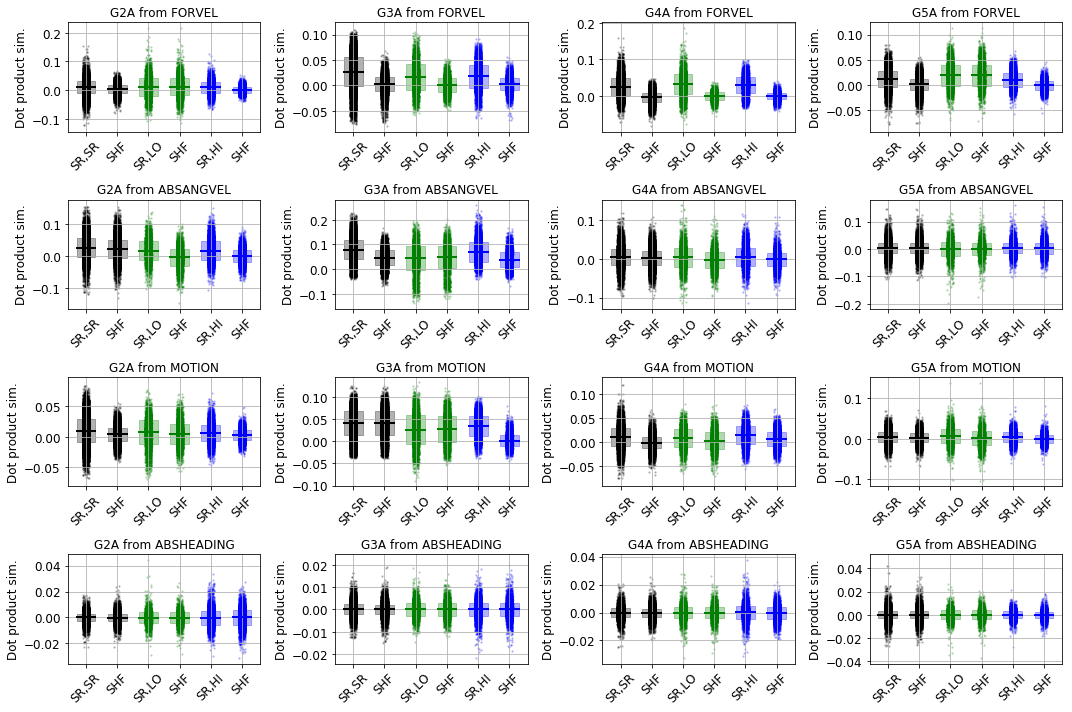

In [2]:
PAIRS = [
    ('ASENSORY_AZ', 'ASENSORY_AZ'),
    ('ASENSORY_AZ', 'CL_360_LOWFLOW_ACV'),
    ('ASENSORY_AZ', 'CL_180_HighFlow_ACV'),
]

COLORS = {
    ('ASENSORY_AZ', 'ASENSORY_AZ'): 'k',
    ('ASENSORY_AZ', 'CL_360_LOWFLOW_ACV'): 'g',
    ('ASENSORY_AZ', 'CL_180_HighFlow_ACV'): 'b',
}

LABELS = {
    ('ASENSORY_AZ', 'ASENSORY_AZ'): 'SR,SR',
    ('ASENSORY_AZ', 'CL_360_LOWFLOW_ACV'): 'SR,LO',
    ('ASENSORY_AZ', 'CL_180_HighFlow_ACV'): 'SR,HI',
}

fig, axs = plt.subplots(len(SRCS), len(TARGS), figsize=(15, 10), tight_layout=True)

for p_ctr, (expt_0, expt_1) in enumerate(PAIRS):
    df_cols = ['{}_FROM_{}'.format(targ, src) for targ, src in c_product(TARGS, SRCS)]
    df_data = {}
    for src, ax_row in zip(SRCS, axs):
        for targ, ax in zip(TARGS, ax_row):
            
            # load filters for both expts
            hs_0 = pd.read_csv(os.path.join(
                LOAD_DIR, '{}_{}_FROM_{}_{}.csv'.format(expt_0, targ, src, SFX)))\
                .drop(['TRIAL', 'N', 'R2'], axis=1).values

            hs_1 = pd.read_csv(os.path.join(
                LOAD_DIR, '{}_{}_FROM_{}_{}.csv'.format(expt_1, targ, src, SFX)))\
                .drop(['TRIAL', 'N', 'R2'], axis=1).values

            smtys = hs_0.dot(hs_1.T)
            if expt_0 == expt_1:
                np.fill_diagonal(smtys, np.nan)

            smtys = smtys.flatten()
            df_data['{}_FROM_{}'.format(targ, src)] = smtys
            
            # plot scatter data
            c = COLORS[(expt_0, expt_1)]
            xs = 2*p_ctr + np.random.uniform(-.1, .1, len(smtys))
            ax.scatter(xs, smtys, c=COLORS[(expt_0, expt_1)], s=2, alpha=.2)
            
            # plot mean and stdev
            y_mean = np.array([np.nanmean(smtys), np.nanmean(smtys)])
            y_std = np.array([np.nanstd(smtys), np.nanstd(smtys)])
            
            ax.plot([2*p_ctr-.3, 2*p_ctr+.3], [np.nanmean(smtys), np.nanmean(smtys)], lw=2, color=c)
            ax.fill_between([2*p_ctr-.3, 2*p_ctr+.3], y_mean-y_std, y_mean+y_std, color=c, alpha=.3)
            
            # calc and plot shuffled data
            rnd_roll = np.random.randint(5, hs_1.shape[1]-5, len(hs_1))
            hs_1_shf = np.roll(hs_1, rnd_roll, axis=1)
            
            smtys_shf = hs_0.dot(hs_1_shf.T)
            if expt_0 == expt_1:
                np.fill_diagonal(smtys_shf, np.nan)

            smtys_shf = smtys_shf.flatten()
            
            df_data['{}_FROM_{}_SHF'.format(targ, src)] = smtys_shf
            
            # plot scatter data
            c = COLORS[(expt_0, expt_1)]
            xs = 2*p_ctr+1 + np.random.uniform(-.1, .1, len(smtys_shf))
            ax.scatter(xs, smtys_shf, c=COLORS[(expt_0, expt_1)], s=2, alpha=.2)
            
            # plot mean and stdev
            y_mean_shf = np.array([np.nanmean(smtys_shf), np.nanmean(smtys_shf)])
            y_std_shf = np.array([np.nanstd(smtys_shf), np.nanstd(smtys_shf)])
            
            ax.plot([2*p_ctr+1-.3, 2*p_ctr+1+.3], [y_mean_shf, y_mean_shf], lw=2, color=c)
            ax.fill_between([2*p_ctr+1-.3, 2*p_ctr+1+.3], y_mean_shf-y_std_shf, y_mean_shf+y_std_shf, color=c, alpha=.3)
            
            ax.set_title('{} from {}'.format(targ, src))
            
    df = pd.DataFrame(data=df_data, columns=df_cols)
    df.to_csv(os.path.join(
        SAVE_DIR, 'FILTER_COMPARISONS_{}_VS_{}_{}.csv'.format(expt_0, expt_1, SFX)), index=False, na_rep='NaN')
    
for ax in axs.flatten():
    ax.set_xticks(range(2*len(PAIRS)))
    ax.set_xticklabels(sum([[LABELS[pair], 'SHF'] for pair in PAIRS], []), rotation=45)
    ax.set_ylabel('Dot product sim.')
    ax.grid()
    set_font_size(ax, 12)

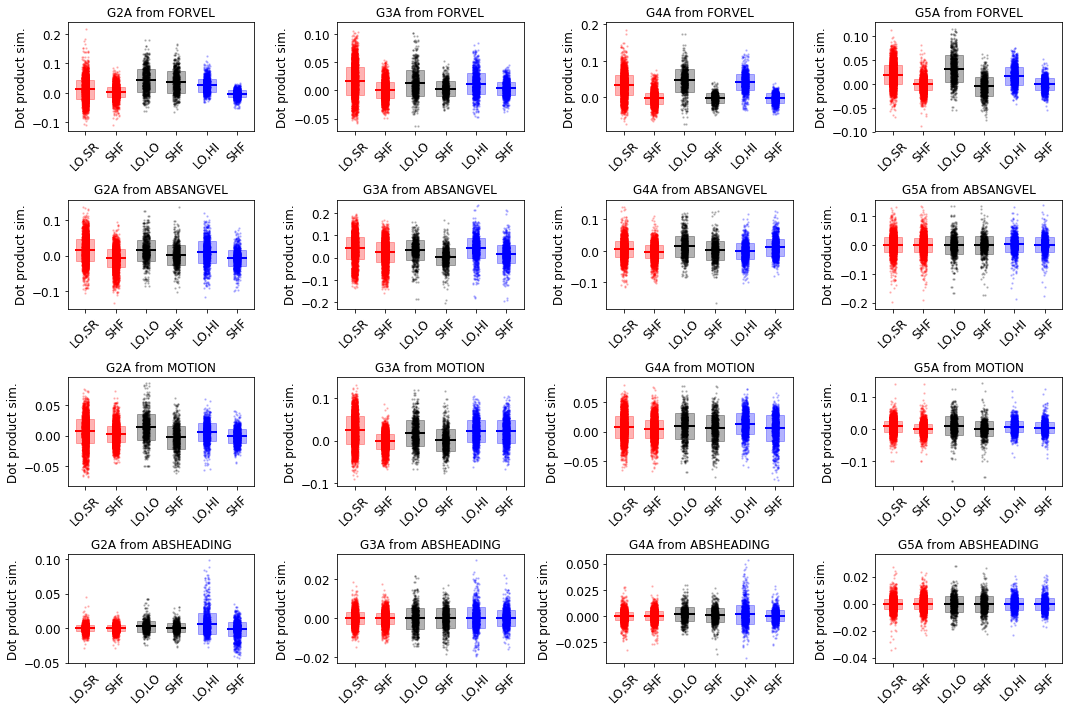

In [3]:
PAIRS = [
    ('CL_360_LOWFLOW_ACV', 'ASENSORY_AZ'),
    ('CL_360_LOWFLOW_ACV', 'CL_360_LOWFLOW_ACV'),
    ('CL_360_LOWFLOW_ACV', 'CL_180_HighFlow_ACV'),
]

COLORS = {
    ('CL_360_LOWFLOW_ACV', 'ASENSORY_AZ'): 'r',
    ('CL_360_LOWFLOW_ACV', 'CL_360_LOWFLOW_ACV'): 'k',
    ('CL_360_LOWFLOW_ACV', 'CL_180_HighFlow_ACV'): 'b',
}

LABELS = {
    ('CL_360_LOWFLOW_ACV', 'ASENSORY_AZ'): 'LO,SR',
    ('CL_360_LOWFLOW_ACV', 'CL_360_LOWFLOW_ACV'): 'LO,LO',
    ('CL_360_LOWFLOW_ACV', 'CL_180_HighFlow_ACV'): 'LO,HI',
}

fig, axs = plt.subplots(len(SRCS), len(TARGS), figsize=(15, 10), tight_layout=True)

for p_ctr, (expt_0, expt_1) in enumerate(PAIRS):
    df_cols = ['{}_FROM_{}'.format(targ, src) for targ, src in c_product(TARGS, SRCS)]
    df_data = {}
    for src, ax_row in zip(SRCS, axs):
        for targ, ax in zip(TARGS, ax_row):
            
            # load filters for both expts
            hs_0 = pd.read_csv(os.path.join(
                LOAD_DIR, '{}_{}_FROM_{}_{}.csv'.format(expt_0, targ, src, SFX)))\
                .drop(['TRIAL', 'N', 'R2'], axis=1).values

            hs_1 = pd.read_csv(os.path.join(
                LOAD_DIR, '{}_{}_FROM_{}_{}.csv'.format(expt_1, targ, src, SFX)))\
                .drop(['TRIAL', 'N', 'R2'], axis=1).values

            smtys = hs_0.dot(hs_1.T)
            if expt_0 == expt_1:
                np.fill_diagonal(smtys, np.nan)

            smtys = smtys.flatten()
            df_data['{}_FROM_{}'.format(targ, src)] = smtys
            
            # plot scatter data
            c = COLORS[(expt_0, expt_1)]
            xs = 2*p_ctr + np.random.uniform(-.1, .1, len(smtys))
            ax.scatter(xs, smtys, c=COLORS[(expt_0, expt_1)], s=2, alpha=.2)
            
            # plot mean and stdev
            y_mean = np.array([np.nanmean(smtys), np.nanmean(smtys)])
            y_std = np.array([np.nanstd(smtys), np.nanstd(smtys)])
            
            ax.plot([2*p_ctr-.3, 2*p_ctr+.3], [np.nanmean(smtys), np.nanmean(smtys)], lw=2, color=c)
            ax.fill_between([2*p_ctr-.3, 2*p_ctr+.3], y_mean-y_std, y_mean+y_std, color=c, alpha=.3)
            
            # calc and plot shuffled data
            rnd_roll = np.random.randint(5, hs_1.shape[1]-5, len(hs_1))
            hs_1_shf = np.roll(hs_1, rnd_roll, axis=1)
            
            smtys_shf = hs_0.dot(hs_1_shf.T)
            if expt_0 == expt_1:
                np.fill_diagonal(smtys_shf, np.nan)

            smtys_shf = smtys_shf.flatten()
            
            df_data['{}_FROM_{}_SHF'.format(targ, src)] = smtys_shf
            
            # plot scatter data
            c = COLORS[(expt_0, expt_1)]
            xs = 2*p_ctr+1 + np.random.uniform(-.1, .1, len(smtys_shf))
            ax.scatter(xs, smtys_shf, c=COLORS[(expt_0, expt_1)], s=2, alpha=.2)
            
            # plot mean and stdev
            y_mean_shf = np.array([np.nanmean(smtys_shf), np.nanmean(smtys_shf)])
            y_std_shf = np.array([np.nanstd(smtys_shf), np.nanstd(smtys_shf)])
            
            ax.plot([2*p_ctr+1-.3, 2*p_ctr+1+.3], [y_mean_shf, y_mean_shf], lw=2, color=c)
            ax.fill_between([2*p_ctr+1-.3, 2*p_ctr+1+.3], y_mean_shf-y_std_shf, y_mean_shf+y_std_shf, color=c, alpha=.3)
            
            ax.set_title('{} from {}'.format(targ, src))
            
    df = pd.DataFrame(data=df_data, columns=df_cols)
    df.to_csv(os.path.join(
        SAVE_DIR, 'FILTER_COMPARISONS_{}_VS_{}_{}.csv'.format(expt_0, expt_1, SFX)), index=False, na_rep='NaN')
    
for ax in axs.flatten():
    ax.set_xticks(range(2*len(PAIRS)))
    ax.set_xticklabels(sum([[LABELS[pair], 'SHF'] for pair in PAIRS], []), rotation=45)
    ax.set_ylabel('Dot product sim.')
    set_font_size(ax, 12)

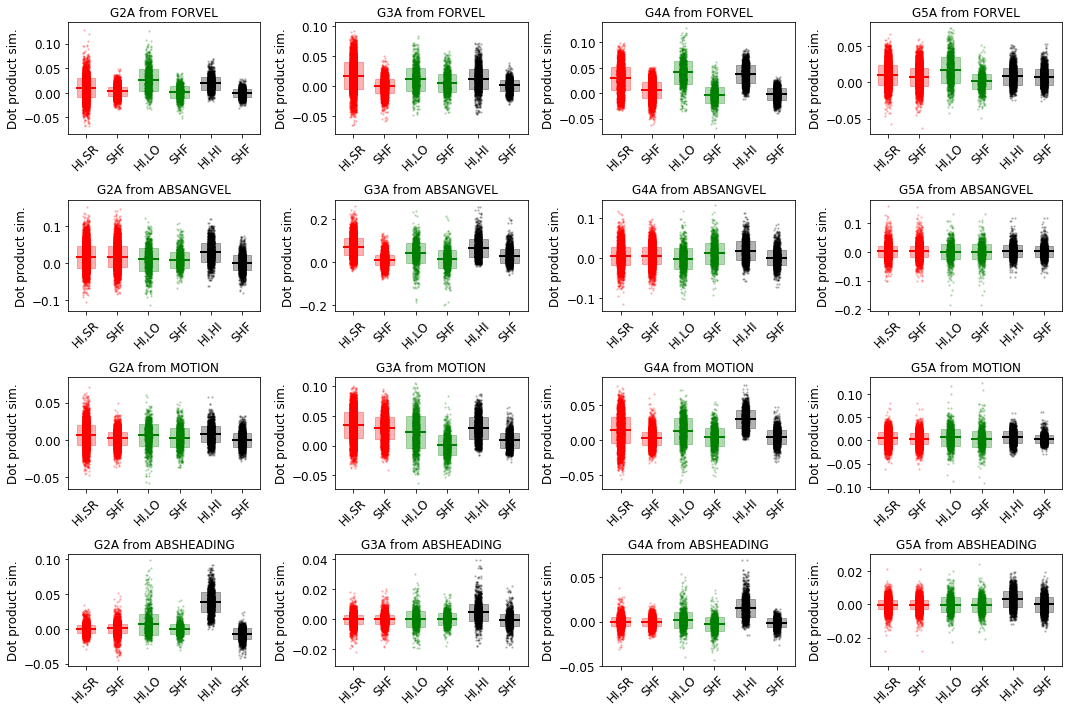

In [4]:
PAIRS = [
    ('CL_180_HighFlow_ACV', 'ASENSORY_AZ'),
    ('CL_180_HighFlow_ACV', 'CL_360_LOWFLOW_ACV'),
    ('CL_180_HighFlow_ACV', 'CL_180_HighFlow_ACV'),
]

COLORS = {
    ('CL_180_HighFlow_ACV', 'ASENSORY_AZ'): 'r',
    ('CL_180_HighFlow_ACV', 'CL_360_LOWFLOW_ACV'): 'g',
    ('CL_180_HighFlow_ACV', 'CL_180_HighFlow_ACV'): 'k',
}

LABELS = {
    ('CL_180_HighFlow_ACV', 'ASENSORY_AZ'): 'HI,SR',
    ('CL_180_HighFlow_ACV', 'CL_360_LOWFLOW_ACV'): 'HI,LO',
    ('CL_180_HighFlow_ACV', 'CL_180_HighFlow_ACV'): 'HI,HI',
}

fig, axs = plt.subplots(len(SRCS), len(TARGS), figsize=(15, 10), tight_layout=True)

for p_ctr, (expt_0, expt_1) in enumerate(PAIRS):
    df_cols = ['{}_FROM_{}'.format(targ, src) for targ, src in c_product(TARGS, SRCS)]
    df_data = {}
    for src, ax_row in zip(SRCS, axs):
        for targ, ax in zip(TARGS, ax_row):
            
            # load filters for both expts
            hs_0 = pd.read_csv(os.path.join(
                LOAD_DIR, '{}_{}_FROM_{}_{}.csv'.format(expt_0, targ, src, SFX)))\
                .drop(['TRIAL', 'N', 'R2'], axis=1).values

            hs_1 = pd.read_csv(os.path.join(
                LOAD_DIR, '{}_{}_FROM_{}_{}.csv'.format(expt_1, targ, src, SFX)))\
                .drop(['TRIAL', 'N', 'R2'], axis=1).values

            smtys = hs_0.dot(hs_1.T)
            if expt_0 == expt_1:
                np.fill_diagonal(smtys, np.nan)

            smtys = smtys.flatten()
            df_data['{}_FROM_{}'.format(targ, src)] = smtys
            
            # plot scatter data
            c = COLORS[(expt_0, expt_1)]
            xs = 2*p_ctr + np.random.uniform(-.1, .1, len(smtys))
            ax.scatter(xs, smtys, c=COLORS[(expt_0, expt_1)], s=2, alpha=.2)
            
            # plot mean and stdev
            y_mean = np.array([np.nanmean(smtys), np.nanmean(smtys)])
            y_std = np.array([np.nanstd(smtys), np.nanstd(smtys)])
            
            ax.plot([2*p_ctr-.3, 2*p_ctr+.3], [np.nanmean(smtys), np.nanmean(smtys)], lw=2, color=c)
            ax.fill_between([2*p_ctr-.3, 2*p_ctr+.3], y_mean-y_std, y_mean+y_std, color=c, alpha=.3)
            
            # calc and plot shuffled data
            rnd_roll = np.random.randint(5, hs_1.shape[1]-5, len(hs_1))
            hs_1_shf = np.roll(hs_1, rnd_roll, axis=1)
            
            smtys_shf = hs_0.dot(hs_1_shf.T)
            if expt_0 == expt_1:
                np.fill_diagonal(smtys_shf, np.nan)

            smtys_shf = smtys_shf.flatten()
            
            df_data['{}_FROM_{}_SHF'.format(targ, src)] = smtys_shf
            
            # plot scatter data
            c = COLORS[(expt_0, expt_1)]
            xs = 2*p_ctr+1 + np.random.uniform(-.1, .1, len(smtys_shf))
            ax.scatter(xs, smtys_shf, c=COLORS[(expt_0, expt_1)], s=2, alpha=.2)
            
            # plot mean and stdev
            y_mean_shf = np.array([np.nanmean(smtys_shf), np.nanmean(smtys_shf)])
            y_std_shf = np.array([np.nanstd(smtys_shf), np.nanstd(smtys_shf)])
            
            ax.plot([2*p_ctr+1-.3, 2*p_ctr+1+.3], [y_mean_shf, y_mean_shf], lw=2, color=c)
            ax.fill_between([2*p_ctr+1-.3, 2*p_ctr+1+.3], y_mean_shf-y_std_shf, y_mean_shf+y_std_shf, color=c, alpha=.3)
            
            ax.set_title('{} from {}'.format(targ, src))
            
    df = pd.DataFrame(data=df_data, columns=df_cols)
    df.to_csv(os.path.join(
        SAVE_DIR, 'FILTER_COMPARISONS_{}_VS_{}_{}.csv'.format(expt_0, expt_1, SFX)), index=False, na_rep='NaN')
    
for ax in axs.flatten():
    ax.set_xticks(range(2*len(PAIRS)))
    ax.set_xticklabels(sum([[LABELS[pair], 'SHF'] for pair in PAIRS], []), rotation=45)
    ax.set_ylabel('Dot product sim.')
    set_font_size(ax, 12)